In [1]:
suppressPackageStartupMessages({
    library(monocle)
    
    library(RColorBrewer)
    library(dplyr)
    library(ggplot2)
    library(reshape2)
    library(scales)
})

Warning message:
“replacing previous import by ‘splines::splineDesign’ when loading ‘VGAM’”Warning message:
“replacing previous import by ‘grid::arrow’ when loading ‘monocle’”Warning message:
“replacing previous import by ‘grid::unit’ when loading ‘monocle’”Warning message:
“replacing previous import by ‘igraph::clusters’ when loading ‘monocle’”Warning message:
“replacing previous import by ‘ggplot2::Position’ when loading ‘monocle’”

This analysis was made using Monocle version 2.3.5. The source code for Monocle 2.3.5 is available as a supplementary file to Cao et al. 2017 on the Science website. We are working on updating the analysis to the latest version of Monocle.

In [3]:
sessionInfo()

R version 3.2.1 (2015-06-18)
Platform: x86_64-unknown-linux-gnu (64-bit)
Running under: CentOS release 6.8 (Final)

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] splines   stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] scales_0.4.1        reshape2_1.4.2      dplyr_0.7.1        
 [4] RColorBrewer_1.1-2  monocle_2.3.5       DDRTree_0.1.5      
 [7] irlba_2.2.1         VGAM_1.0-3          ggplot2_2.2.1      
[10] Biobase_2.30.0      BiocGenerics_0.16.1 Matrix_1.2-7.1     

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.11           bindr_0.1              plyr_1

In [2]:
# at certain "checkpoints" in this notebook, we save our progress to this RData file
# run this cell to load your progress if you have already reached through one or more checkpoints in the notebook

load("RData/L2.both.experiments.joint.cell.type.id.RData")

In [4]:
UMI.counts = list()

In [5]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.1.plates.1-2.RData",
    destfile = "RData/Cao_et_al_2017.experiment.1.plates.1-2.RData")

In [6]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.1.plates.3-4.RData",
    destfile = "RData/Cao_et_al_2017.experiment.1.plates.3-4.RData")

In [7]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.1.plate.5.RData",
    destfile = "RData/Cao_et_al_2017.experiment.1.plate.5.RData")

In [8]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.1.plate.6.RData",
    destfile = "RData/Cao_et_al_2017.experiment.1.plate.6.RData")

In [9]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.1.plate.7.RData",
    destfile = "RData/Cao_et_al_2017.experiment.1.plate.7.RData")

In [10]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.1.plates.8-10.RData",
    destfile = "RData/Cao_et_al_2017.experiment.1.plates.8-10.RData")

In [11]:
load("RData/Cao_et_al_2017.experiment.1.plates.1-2.RData")
UMI.counts$plate_1_2 = UMI_count
rm(UMI_count)

In [12]:
load("RData/Cao_et_al_2017.experiment.1.plates.3-4.RData")
UMI.counts$plate_3_4 = UMI_count
rm(UMI_count)

In [13]:
load("RData/Cao_et_al_2017.experiment.1.plate.5.RData")
UMI.counts$plate_5 = UMI_count
rm(UMI_count)

In [14]:
load("RData/Cao_et_al_2017.experiment.1.plate.6.RData")
UMI.counts$plate_6 = UMI_count
rm(UMI_count)

In [15]:
load("RData/Cao_et_al_2017.experiment.1.plate.7.RData")
UMI.counts$plate_7 = UMI_count
rm(UMI_count)

In [16]:
load("RData/Cao_et_al_2017.experiment.1.plates.8-10.RData")
UMI.counts$plate_8_9_10 = UMI_count
rm(UMI_count)

In [17]:
experiment.1.mat = do.call(cbind, UMI.counts)

In [19]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.1.gene_annotations",
    destfile = "RData/Cao_et_al_2017.experiment.1.gene_annotations.tsv")

In [20]:
genes = read.csv(
    "RData/Cao_et_al_2017.experiment.1.gene_annotations.tsv",
    col.names=c("id", "type", "exon_intron", "name", "index"))

genes = genes[genes$id %in% rownames(UMI.counts$plate_1_2),]

In [21]:
mat.exon = experiment.1.mat[genes$exon_intron == "exon",]
mat.intron = experiment.1.mat[genes$exon_intron == "intron",]
nrow(mat.exon) == nrow(mat.intron)
experiment.1.mat = mat.exon + mat.intron
experiment.1.mat = experiment.1.mat[order(rownames(experiment.1.mat)),]
rm(list=c("mat.exon", "mat.intron"))

[1] TRUE

In [22]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/C.elegans.WB253.gene.id.to.symbol",
    destfile = "RData/C.elegans.WB253.gene.id.to.symbol.tsv")

In [24]:
gene.symbols = read.table(
    "RData/C.elegans.WB253.gene.id.to.symbol.tsv",
    col.names = c("gene_id", "symbol"), colClasses = rep("character", 2))

rownames(gene.symbols) = gene.symbols$gene_id

sum(!(rownames(experiment.1.mat) %in% rownames(gene.symbols))) == 0

[1] TRUE

In [25]:
experiment.1.pd = new("AnnotatedDataFrame", data = data.frame(
    cell = colnames(experiment.1.mat),
    row.names = colnames(experiment.1.mat),
    n.umi = colSums(experiment.1.mat),
    plate = sapply(colnames(experiment.1.mat), function(x) strsplit(x, "-")[[1]][2]),
    experiment = "Experiment_1"))
       
experiment.1.fd = new("AnnotatedDataFrame", data = data.frame(
    gene_id = gene.symbols$gene_id,
    symbol = gene.symbols$symbol,
    row.names = gene.symbols$gene_id))

experiment.1.cds = newCellDataSet(
    experiment.1.mat,
    phenoData = experiment.1.pd,
    featureData = experiment.1.fd,
    expressionFamily = negbinomial.size())

In [26]:
dim(experiment.1.cds)

Features  Samples 
   20271    53460

In [27]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.2.counts.mm",
    destfile = "RData/Cao_et_al_2017.experiment.2.counts.mm")

In [28]:
df = read.table(
    "RData/Cao_et_al_2017.experiment.2.counts.mm",
    sep = ",",
    col.names = c("gene.idx", "cell.idx", "count"),
    colClasses = c("integer", "integer", "integer"))

head(df)

gene.idx,cell.idx,count
93211,28,1
27747,28,1
21301,28,3
22621,28,3
1623,28,2
21085,28,1


In [29]:
experiment.2.mat = sparseMatrix(i = df$gene.idx, j = df$cell.idx, x = df$count)
experiment.2.mat[1:10,1:10]

10 x 10 sparse Matrix of class "dgCMatrix"
                         
 [1,] . . . . . . . . . .
 [2,] . . . . . . . . . .
 [3,] . . . . . . . . . .
 [4,] . . . . . . . . . .
 [5,] . . . . . . . . . .
 [6,] . . . . . . . . 1 .
 [7,] . . . . . . . . . .
 [8,] . . . . . . . . . .
 [9,] . . . . . . . . . .
[10,] . . . . . . . . . .

In [30]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.2.cell.annotations.tsv",
    destfile = "RData/Cao_et_al_2017.experiment.2.cell.annotations.tsv")

In [31]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.2.gene.annotations.tsv",
    destfile = "RData/Cao_et_al_2017.experiment.2.gene.annotations.tsv")

In [32]:
cell.annotations = read.table(
    "RData/Cao_et_al_2017.experiment.2.cell.annotations.tsv",
    sep = ",", col.names = c("cell", "cell.idx"))

gene.annotations = read.csv(
    "RData/Cao_et_al_2017.experiment.2.gene.annotations.tsv",
    col.names = c("gene", "gene.type", "exon.intron", "symbol", "gene.idx"), header=F)

head(cell.annotations)
head(gene.annotations)

cell,cell.idx
cele-all-001.GCTCTCGCCT,1
cele-all-001.ACTCTCTCAA,2
cele-all-001.ATGAACGCGC,3
cele-all-001.CCGGCGGCGA,4
cele-all-001.ACGGAGAATA,5
cele-all-001.GGTAAGCTCT,6


gene,gene.type,exon.intron,symbol,gene.idx
WBGene00023193,snoRNA,exon,no_name,1
WBGene00023193_intron,snoRNA,intron,no_name_intron,2
WBGene00022277,protein_coding,exon,homt-1,3
WBGene00022277_intron,protein_coding,intron,homt-1_intron,4
WBGene00022276,protein_coding,exon,nlp-40,5
WBGene00022276_intron,protein_coding,intron,nlp-40_intron,6


In [33]:
nrow(experiment.2.mat) == nrow(gene.annotations$gene)
ncol(experiment.2.mat) == nrow(cell.annotations$cell)
rownames(experiment.2.mat) = as.character(gene.annotations$gene)
colnames(experiment.2.mat) = as.character(cell.annotations$cell)
experiment.2.mat[1:10,1:10]

logical(0)

logical(0)

   [[ suppressing 10 column names ‘cele-all-001.GCTCTCGCCT’, ‘cele-all-001.ACTCTCTCAA’, ‘cele-all-001.ATGAACGCGC’ ... ]]


10 x 10 sparse Matrix of class "dgCMatrix"
                                         
WBGene00023193        . . . . . . . . . .
WBGene00023193_intron . . . . . . . . . .
WBGene00022277        . . . . . . . . . .
WBGene00022277_intron . . . . . . . . . .
WBGene00022276        . . . . . . . . . .
WBGene00022276_intron . . . . . . . . 1 .
WBGene00022278        . . . . . . . . . .
WBGene00022278_intron . . . . . . . . . .
WBGene00235381        . . . . . . . . . .
WBGene00235381_intron . . . . . . . . . .

In [34]:
mat.exon = experiment.2.mat[gene.annotations$exon.intron == "exon",]
mat.intron = experiment.2.mat[gene.annotations$exon.intron == "intron",]
nrow(mat.exon) == nrow(mat.intron)
experiment.2.mat = mat.exon + mat.intron
experiment.2.mat = experiment.2.mat[order(rownames(experiment.2.mat)),]
rm(list=c("df", "mat.exon", "mat.intron"))

[1] TRUE

In [35]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/C.elegans.WB253.gene.id.to.symbol",
    destfile = "RData/C.elegans.WB253.gene.id.to.symbol.tsv")

In [37]:
gene.symbols = read.table(
    "RData/C.elegans.WB253.gene.id.to.symbol.tsv",
    col.names = c("gene", "symbol"), colClasses = rep("character", 2))

rownames(gene.symbols) = gene.symbols$gene

sum(rownames(experiment.2.mat) %in% rownames(gene.symbols))
experiment.2.mat = experiment.2.mat[rownames(experiment.2.mat) %in% rownames(gene.symbols),]
dim(experiment.2.mat)

[1] 20271

[1] 20271 11334

In [39]:
experiment.2.pd = new("AnnotatedDataFrame", data = data.frame(
    cell = colnames(experiment.2.mat),
    row.names = colnames(experiment.2.mat),
    n.umi = colSums(experiment.2.mat),
    plate = sapply(colnames(experiment.2.mat), function(x) strsplit(x, "-")[[1]][2]),
    experiment = "Experiment_2"))
        
experiment.2.fd = new("AnnotatedDataFrame", data = data.frame(
    gene = gene.symbols$gene,
    symbol = gene.symbols$symbol,
    row.names = gene.symbols$gene))

experiment.2.cds = newCellDataSet(experiment.2.mat,
    phenoData = experiment.2.pd, featureData = experiment.2.fd, expressionFamily = negbinomial.size())

In [40]:
dim(experiment.2.cds)

Features  Samples 
   20271    11334

In [41]:
sum(experiment.1.fd$symbol != experiment.2.fd$symbol)

[1] 0

In [42]:
pd = new("AnnotatedDataFrame", data = rbind(experiment.1.pd@data, experiment.2.pd@data))
fd = experiment.1.fd

unfiltered.cds = newCellDataSet(cbind(experiment.1.mat, experiment.2.mat),
    phenoData = pd, featureData = fd, expressionFamily = negbinomial.size())

dim(unfiltered.cds)

Features  Samples 
   20271    64794

In [44]:
rm(list = c(
    "cell.annotations", "gene.annotations",
    "experiment.1.cds", "experiment.1.fd", "experiment.1.mat", "experiment.1.pd",
    "experiment.2.cds", "experiment.2.fd", "experiment.2.mat", "experiment.2.pd",
    "genes", "gene.symbols", "UMI.counts", "fd", "pd"))

Warning message in rm(list = c("cell.annotations", "gene.annotations", "experiment.1.cds", :
“object 'cell.annotations' not found”Warning message in rm(list = c("cell.annotations", "gene.annotations", "experiment.1.cds", :
“object 'gene.annotations' not found”Warning message in rm(list = c("cell.annotations", "gene.annotations", "experiment.1.cds", :
“object 'experiment.1.cds' not found”Warning message in rm(list = c("cell.annotations", "gene.annotations", "experiment.1.cds", :
“object 'experiment.1.fd' not found”Warning message in rm(list = c("cell.annotations", "gene.annotations", "experiment.1.cds", :
“object 'experiment.1.mat' not found”Warning message in rm(list = c("cell.annotations", "gene.annotations", "experiment.1.cds", :
“object 'experiment.1.pd' not found”Warning message in rm(list = c("cell.annotations", "gene.annotations", "experiment.1.cds", :
“object 'genes' not found”Warning message in rm(list = c("cell.annotations", "gene.annotations", "experiment.1.cds", :
“object 'g

In [45]:
get.gene.id = function(cds, symbol) {
    return(as.character(fData(cds)[fData(cds)$symbol == symbol, "gene_id"]))
}

expresses.gene = function(cds, symbol, thresh = 1) {
    return(exprs(cds)[get.gene.id(cds, symbol), ] >= thresh)
}

In [46]:
summary(expresses.gene(unfiltered.cds, "sbt-1"))

   Mode   FALSE    TRUE    NA's 
logical   62025    2769       0 

In [47]:
pData(unfiltered.cds)$n.neuron.markers =
    expresses.gene(unfiltered.cds, "egl-21") +
    expresses.gene(unfiltered.cds, "egl-3") +
    expresses.gene(unfiltered.cds, "sbt-1") +
    expresses.gene(unfiltered.cds, "ida-1") +
    expresses.gene(unfiltered.cds, "casy-1") +
    expresses.gene(unfiltered.cds, "mec-12") +
    expresses.gene(unfiltered.cds, "unc-104") +
    expresses.gene(unfiltered.cds, "unc-41") +
    expresses.gene(unfiltered.cds, "nlp-14") +
    expresses.gene(unfiltered.cds, "nlp-21") +
    expresses.gene(unfiltered.cds, "snet-1") +
    expresses.gene(unfiltered.cds, "odr-10") +
    expresses.gene(unfiltered.cds, "flp-17") +
    expresses.gene(unfiltered.cds, "R102.2") +
    expresses.gene(unfiltered.cds, "dyf-2") +
    expresses.gene(unfiltered.cds, "che-3") +
    expresses.gene(unfiltered.cds, "nphp-4") +
    expresses.gene(unfiltered.cds, "nlp-12") +
    expresses.gene(unfiltered.cds, "gcy-3") +
    expresses.gene(unfiltered.cds, "gcy-5") +
    expresses.gene(unfiltered.cds, "gcy-6") +
    expresses.gene(unfiltered.cds, "gcy-7") +
    expresses.gene(unfiltered.cds, "des-2") +
    expresses.gene(unfiltered.cds, "deg-3") +
    expresses.gene(unfiltered.cds, "gcy-36") +
    expresses.gene(unfiltered.cds, "gcy-37") +
    expresses.gene(unfiltered.cds, "gcy-32") +
    expresses.gene(unfiltered.cds, "mec-17") +
    expresses.gene(unfiltered.cds, "mec-7") +
    expresses.gene(unfiltered.cds, "flr-2") +
    expresses.gene(unfiltered.cds, "tbh-1") +
    expresses.gene(unfiltered.cds, "flp-1") +
    expresses.gene(unfiltered.cds, "unc-25") +
    expresses.gene(unfiltered.cds, "dat-1") +
    expresses.gene(unfiltered.cds, "cat-2") +
    expresses.gene(unfiltered.cds, "unc-17") +
    expresses.gene(unfiltered.cds, "cho-1") +
    expresses.gene(unfiltered.cds, "cha-1") +
    expresses.gene(unfiltered.cds, "acr-18") +
    expresses.gene(unfiltered.cds, "acr-15")

In [48]:
pData(unfiltered.cds) %>% filter(n.umi >= 100 & n.umi < 200) %>%
    group_by(experiment, n.neuron.markers > 0) %>% summarize(n = n())

experiment,n.neuron.markers > 0,n
Experiment_1,FALSE,5661
Experiment_1,TRUE,3165
Experiment_2,FALSE,1586
Experiment_2,TRUE,449


In [49]:
cds = unfiltered.cds[, with(pData(unfiltered.cds), n.umi >= 200 | (n.umi >= 100 & n.neuron.markers > 0))]
dim(cds)

Features  Samples 
   20271    44148

In [ ]:
save.image("RData/L2.both.experiments.joint.cell.type.id.RData")

In [119]:
cds = estimateSizeFactors(cds)
cds = estimateDispersions(cds)
cds = detectGenes(cds, 0.1)

Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message in `[<-.data.frame`(`*tmp*`, res$mu == 0, value = structure(list(:
“provided 1 variable to replace 0 variables”Warning message in `[<-.data.frame`(`*tmp*`, res$mu == 0, value = structure(list(:
“provided 1 variable to replace 0 variables”Removing 533 outliers


In [120]:
save.image("RData/L2.both.experiments.joint.cell.type.id.RData")

In [121]:
set.seed(42)
cds = reduceDimension(
    cds, max_components = 2, norm_method = "log",
    num_dim = 50, reduction_method = "tSNE",
    verbose = T)

pData(cds)$tsne_1 = reducedDimA(cds)[1,]
pData(cds)$tsne_2 = reducedDimA(cds)[2,]

Remove noise by PCA ...
Reduce dimension by tSNE ...


Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

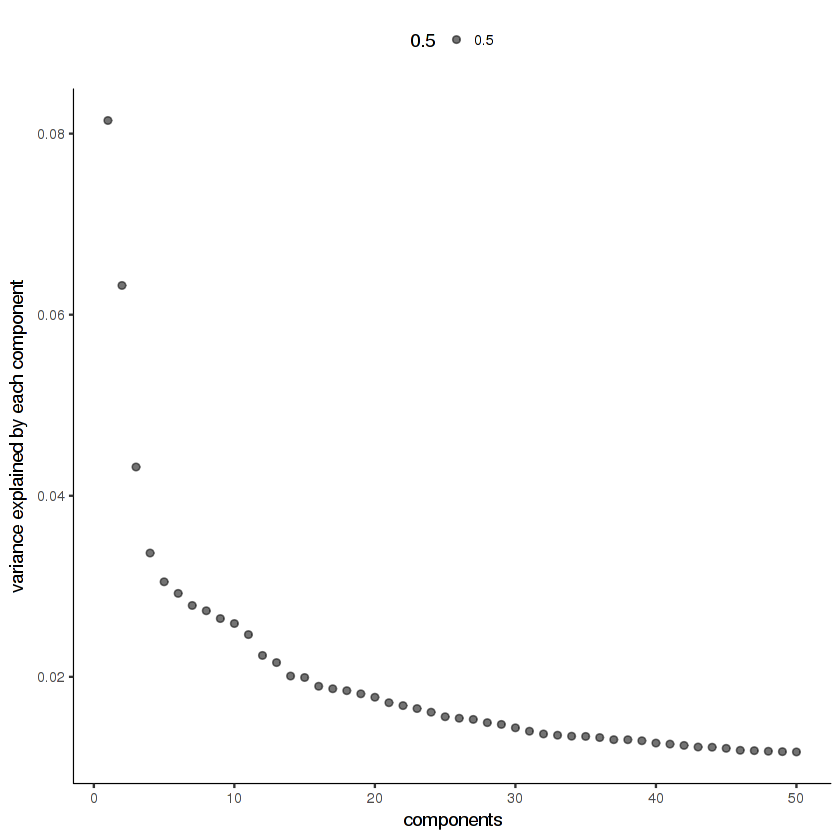

In [122]:
plot_pc_variance_explained(cds)

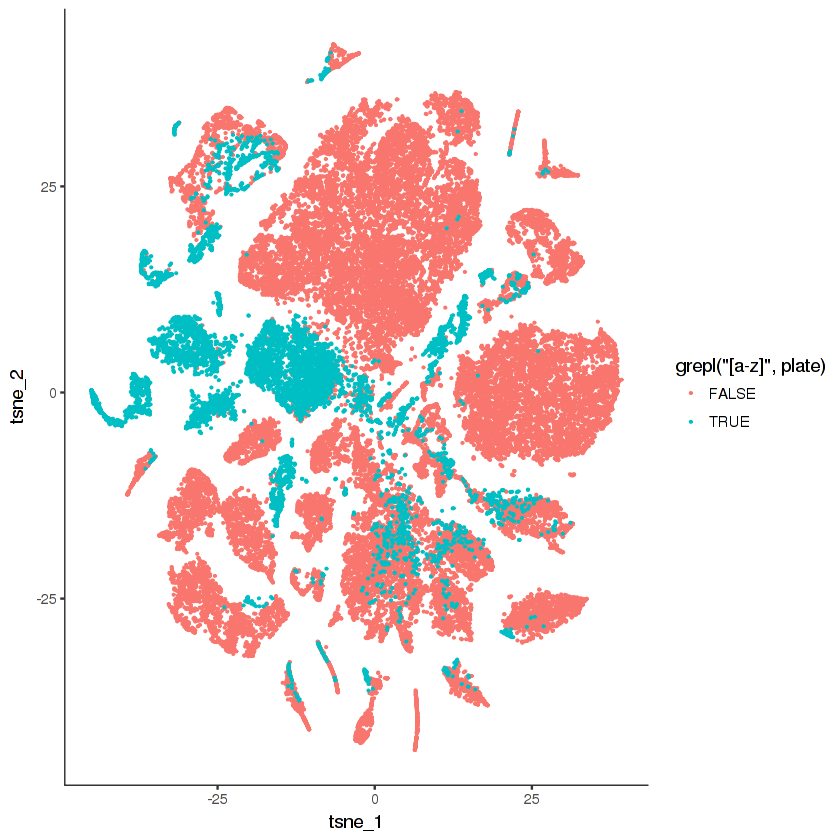

In [190]:
ggplot(pData(cds), aes(x = tsne_1, y = tsne_2, color = grepl("[a-z]", plate))) +
    geom_point(size = 0.1) + monocle:::monocle_theme_opts()

In [124]:
save.image("RData/L2.both.experiments.joint.cell.type.id.RData")

Distance cutoff calculated to 4.069059 


the length of the distance: 974500878


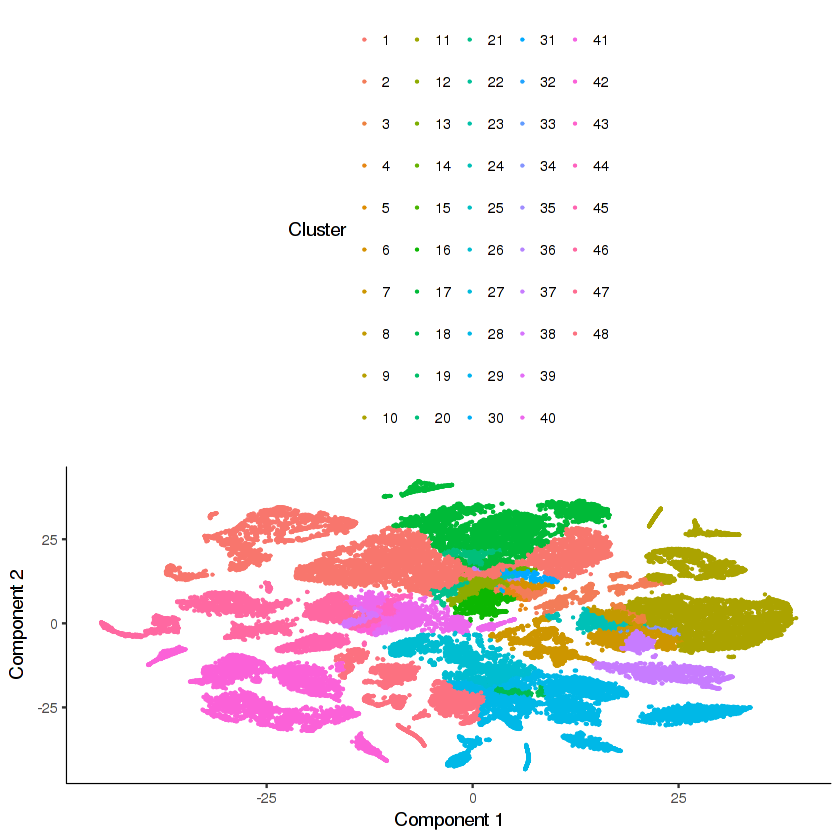

In [125]:
cds = clusterCells_Density_Peak(cds)
plot_cell_clusters(cds, cell_size = 0.15)

Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

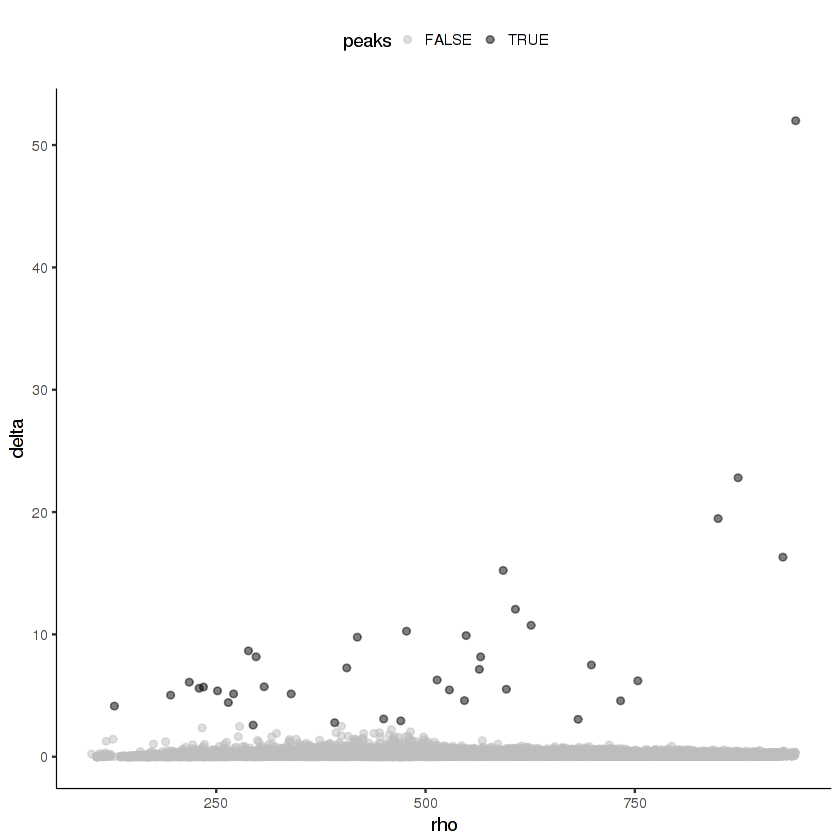

In [154]:
plot_rho_delta(cds, rho_threshold = 30, delta_threshold = 2.5)

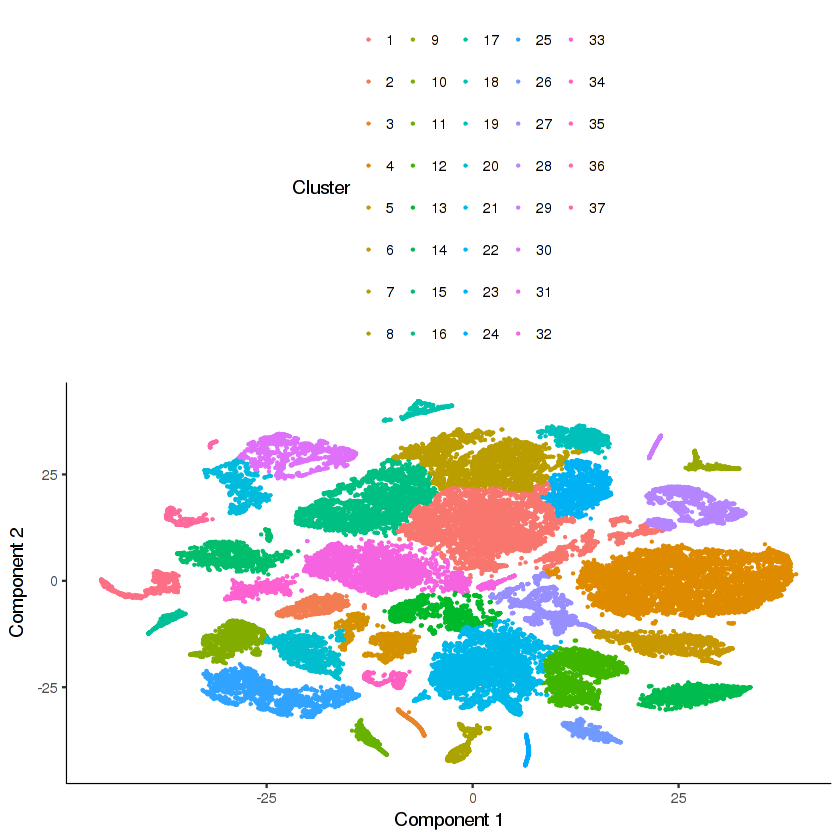

In [155]:
cds = clusterCells_Density_Peak(cds, rho_threshold = 30, delta_threshold = 2.5, skip_rho_sigma = T)
plot_cell_clusters(cds, cell_size = 0.15)

In [12]:
pData(cds)$Cluster = ifelse(with(pData(cds),
    Cluster == 1 & tsne_1 > 4.1 & tsne_1 > tsne_2), 38, pData(cds)$Cluster)

pData(cds)$Cluster = ifelse(with(pData(cds),
    Cluster == 4 & tsne_1 < 12), 38, pData(cds)$Cluster)

pData(cds)$Cluster = ifelse(with(pData(cds),
    Cluster == 5 & tsne_1 > -13.8 & tsne_2 < -11.5), 39, pData(cds)$Cluster)

pData(cds)$Cluster = ifelse(with(pData(cds),
    Cluster == 5 & tsne_1 > -12), 39, pData(cds)$Cluster)

pData(cds)$Cluster = ifelse(with(pData(cds),
    Cluster == 20 & tsne_1 > -17.6 & tsne_2 > -16), 5, pData(cds)$Cluster)

pData(cds)$Cluster = ifelse(with(pData(cds),
    Cluster == 5 & tsne_1 < -16.5 & tsne_2 < -15), 20, pData(cds)$Cluster)

In [13]:
pData(cds)$Cluster = factor(pData(cds)$Cluster)

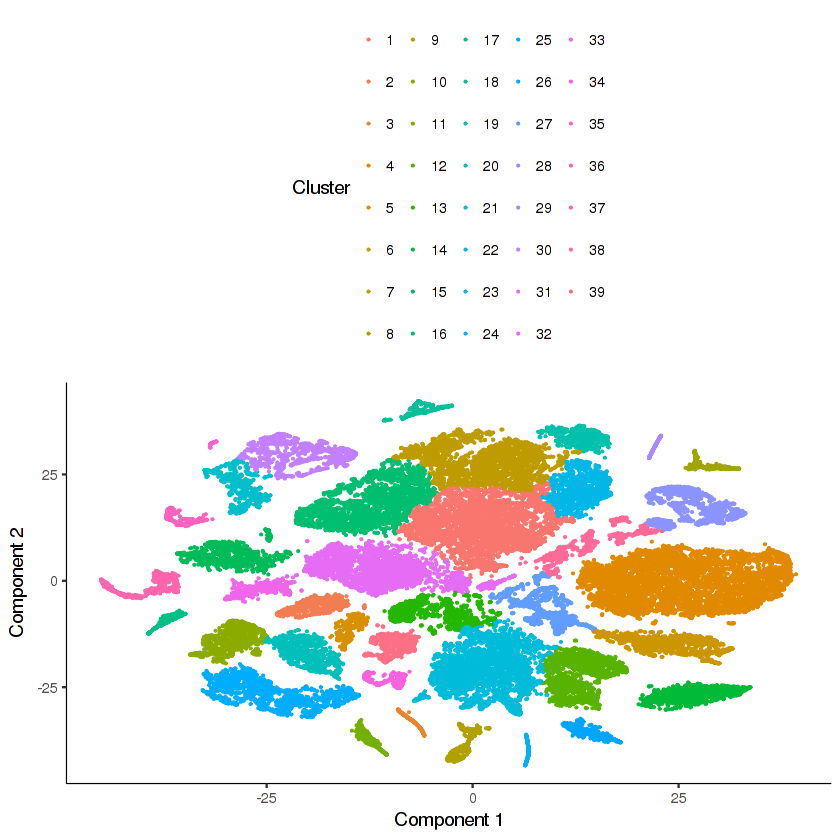

In [14]:
plot_cell_clusters(cds, cell_size = 0.1)

In [ ]:
get.cluster.markers = function(cds) {    
    cluster_means = lapply(1:length(unique(pData(cds)$Cluster)),
                           function(x) rowMeans(exprs(cds)[, pData(cds)$Cluster == x]))
    cluster_means = t(do.call(rbind, cluster_means))
    colnames(cluster_means) = 1:length(unique(pData(cds)$Cluster))
    specificity_scores = apply(cluster_means, 1, function(x) 1 - sum(x >= 0.1*max(x))/length(x))
    cluster_marker_scores = sweep(cluster_means, 1, specificity_scores^3, "*")
    
    cluster_marker_df = melt(cluster_marker_scores)
    names(cluster_marker_df) = c("gene_id", "cluster", "score")
    cluster_marker_df = inner_join(cluster_marker_df, fData(cds)[, 1:3], by= "gene_id") %>%
        group_by(cluster) %>% arrange(-score) %>% mutate(rank = rank(-score)) %>%
        filter(rank <= 100) %>% arrange(cluster, rank)
        
    return(cluster_marker_df)
}

In [15]:
cluster.markers = get.cluster.markers(cds)

In [89]:
cluster.markers %>% filter(cluster == 39) %>% head(20)

gene_id,cluster,score,symbol,num_cells_expressed,rank
WBGene00003891,39,9.0931093,osm-11,1408,1
WBGene00009983,39,3.8376546,cut-2,4234,2
WBGene00009982,39,2.8481248,F53F1.4,3398,3
WBGene00000739,39,2.7316267,col-166,5145,4
WBGene00000611,39,2.1721417,col-34,1604,5
WBGene00003001,39,1.6564676,lin-12,1592,6
WBGene00000718,39,1.5847584,col-145,1300,7
WBGene00000699,39,1.2519703,col-125,5074,8
WBGene00003964,39,1.0356182,pdi-3,16774,9
WBGene00000066,39,0.9198498,act-4,19759,10


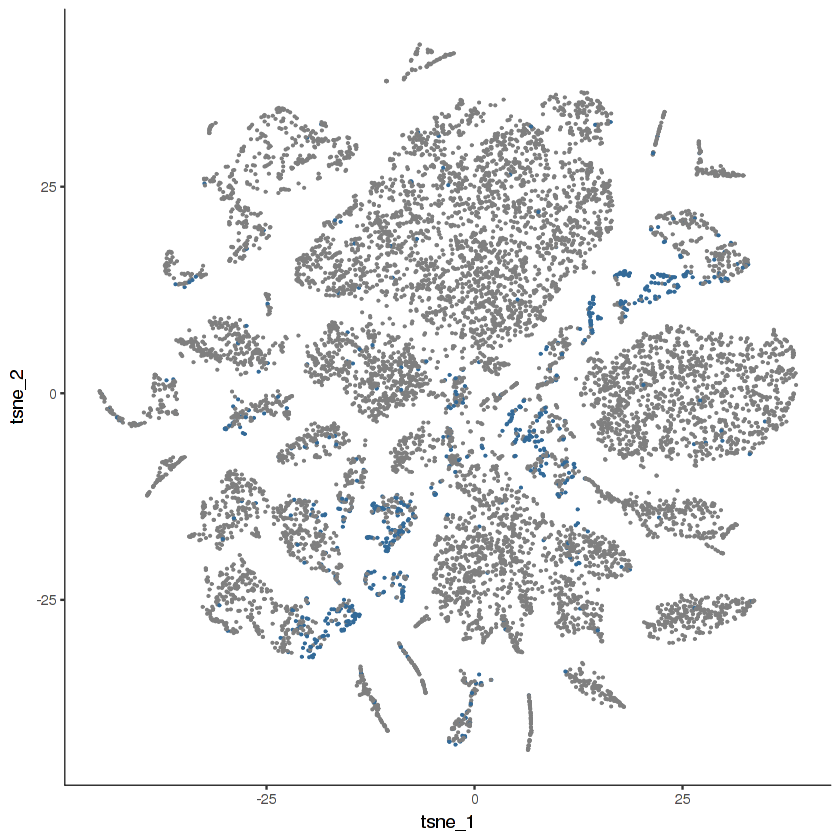

In [98]:
plot.expr(cds, "mua-3", sample_size = 10000)

In [ ]:
#  1 BWM
#  2 Gonad (somatic)
#  3 Neurons (PVC/PVD)
#  4 Gonad (germline)
#  5 Hypodermis
#  6 Neurons
#  7 BWM
#  8 Glia (amphid/phasmid sheath)
#  9 Intestinal/rectal muscle
# 10 Hypodermis
# 11 Neurons (touch receptors)
# 12 Neurons
# 13 Gonad (sex myoblasts)
# 14 Coelomocytes
# 15 Gonad (germline)
# 16 BWM
# 17 Neurons (flp-1 interneurons)
# 18 Pharynx (gland)
# 19 BWM
# 20 Hypodermis
# 21 Pharynx
# 22 Neurons
# 23 BWM
# 24 Unclear
# 25 Hypodermis
# 26 Neurons (GABAergic)
# 27 Glia
# 28 Hypodermis
# 29 Neurons (canal associated)
# 30 Pharynx
# 31 BWM
# 32 BWM (plus some glia, density peak clustering is a bit off)
# 33 Gonad
# 34 Glia
# 35 Pharynx
# 36 Pharynx
# 37 Intestine
# 38 Hypodermis
# 39 Gonad

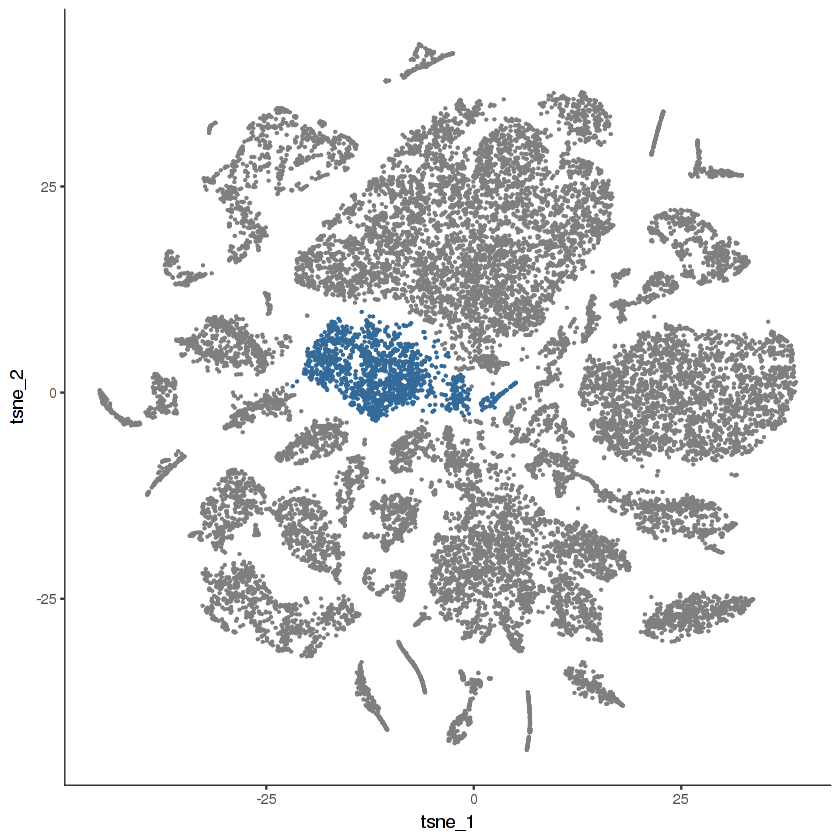

In [96]:
ggplot(pData(cds) %>% sample_n(20000), aes(x = tsne_1, y = tsne_2, color = ifelse(
        Cluster == 32, 1, NA))) +
    geom_point(size = 0.15) +
    guides(color = F) +
    monocle:::monocle_theme_opts()

In [12]:
get.gene.id = function(cds, symbol) {
    return(as.character(fData(cds)[fData(cds)$symbol == symbol, "gene_id"]))
}

expresses.gene = function(cds, symbol, thresh = 1) {
    return(exprs(cds)[get.gene.id(cds, symbol), ] >= thresh)
}

In [33]:
plot.expr = function(cds, gene, thresh = 1, sample_size = NULL) {
    gene.id = as.character(fData(cds)[fData(cds)$symbol == gene, "gene_id"])
    pData(cds)$tmp = ifelse(exprs(cds)[gene.id,] >= thresh, 1, NA)
    
    if (!is.null(sample)) {
        plot = ggplot(pData(cds) %>% sample_n(sample_size), aes(x = tsne_1, y = tsne_2, color = tmp)) +
            geom_point(size = 0.1) +
            guides(color = F) +
            monocle:::monocle_theme_opts()
    } else {
        plot = ggplot(pData(cds), aes(x = tsne_1, y = tsne_2, color = tmp)) +
            geom_point(size = 0.1) +
            guides(color = F) +
            monocle:::monocle_theme_opts()
    }

    pData(cds)$tmp = NULL
    return(plot)
}

In [99]:
plot.clusters = function(cds, cell_size = 0.2) {
    ggplot(pData(cds), aes(x = tsne_1, y = tsne_2, color = cluster.name)) +
        geom_point(size = cell_size) + monocle:::monocle_theme_opts() + theme(legend.position = "left")
}

plot.tissues = function(cds, cell_size = 0.2) {
    ggplot(pData(cds), aes(x = tsne_1, y = tsne_2, color = tissue)) +
        geom_point(size = cell_size) + monocle:::monocle_theme_opts() + theme(legend.position = "left")
}

plot.cell.types = function(cds, cell_size = 0.2) {
    ggplot(pData(cds), aes(x = tsne_1, y = tsne_2, color = cell.type)) +
        geom_point(size = cell_size) + monocle:::monocle_theme_opts() + theme(legend.position = "left")
}

set.cluster.name = function(cds, cluster.name, logical.vec) {
    pData(cds)$cluster.name = ifelse(logical.vec, cluster.name, pData(cds)$cluster.name)
    return(cds)
}

set.tissue = function(cds, tissue, logical.vec) {
    pData(cds)$tissue = ifelse(logical.vec, tissue, pData(cds)$tissue)
    return(cds)
}

set.cell.type = function(cds, cell.type, logical.vec) {
    pData(cds)$cell.type = ifelse(logical.vec, cell.type, pData(cds)$cell.type)
    return(cds)
}

In [100]:
pData(cds)$cluster.name = rep(NA, nrow(pData(cds)))
pData(cds)$tissue = rep(NA, nrow(pData(cds)))
pData(cds)$cell.type = rep(NA, nrow(pData(cds)))

In [101]:
cds = set.cluster.name(cds, "Body wall muscle", pData(cds)$Cluster %in% c(1, 7, 16, 19, 23, 31, 32))

In [102]:
cds = set.cluster.name(cds, "Intestinal/rectal muscle", pData(cds)$Cluster == 9)

In [103]:
cds = set.cluster.name(cds, "Pharynx", pData(cds)$Cluster %in% c(18, 21, 30, 35, 36))

In [104]:
cds = set.cluster.name(cds, "Hypodermis", pData(cds)$Cluster %in% c(5, 10, 20, 25, 28, 38))

In [105]:
cds = set.cluster.name(cds, "Neurons", pData(cds)$Cluster %in% c(3, 6, 11, 12, 17, 22, 26, 29))

In [106]:
cds = set.cluster.name(cds, "Glia and excretory cells", pData(cds)$Cluster %in% c(8, 27, 34))

In [107]:
cds = set.cluster.name(cds, "Intestine", pData(cds)$Cluster == 37)

In [108]:
cds = set.cluster.name(cds, "Gonad/vulval precursors", pData(cds)$Cluster %in% c(2, 13, 33, 39))

In [109]:
cds = set.cluster.name(cds, "Germline", pData(cds)$Cluster %in% c(4, 15))

In [110]:
cds = set.cluster.name(cds, "Coelomocytes", pData(cds)$Cluster == 14)

In [112]:
cds = set.cluster.name(cds, "Unclear", pData(cds)$Cluster == 24)

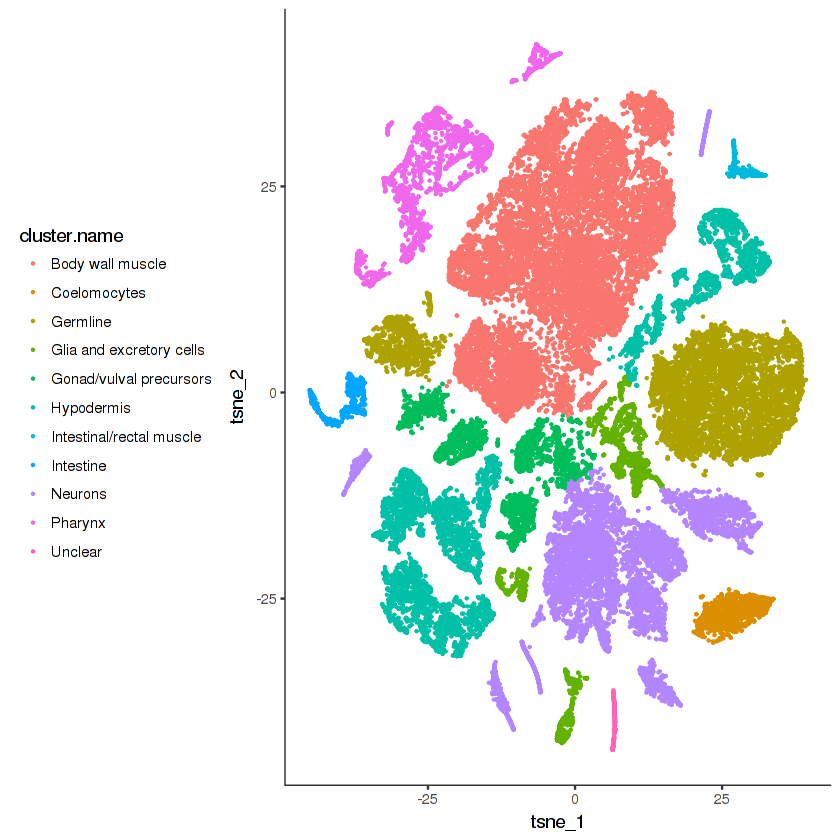

In [113]:
plot.clusters(cds)

In [ ]:
#  1 BWM
#  7 BWM
# 16 BWM
# 19 BWM
# 23 BWM
# 31 BWM
# 32 BWM (plus some glia, density peak clustering is a bit off)

#  9 Intestinal/rectal muscle

# 18 Pharynx (gland)
# 21 Pharynx
# 30 Pharynx
# 35 Pharynx
# 36 Pharynx

#  5 Hypodermis
# 10 Hypodermis
# 20 Hypodermis
# 25 Hypodermis
# 28 Hypodermis
# 38 Hypodermis

#  3 Neurons (PVC/PVD)
#  6 Neurons
# 11 Neurons (touch receptors)
# 12 Neurons
# 17 Neurons (flp-1 interneurons)
# 22 Neurons
# 26 Neurons (GABAergic)
# 29 Neurons (canal associated)

#  8 Glia (amphid/phasmid sheath)
# 27 Glia
# 34 Glia

# 37 Intestine

#  2 Gonad (somatic)
#  4 Gonad (germline)
# 13 Gonad (sex myoblasts)
# 15 Gonad (germline)
# 33 Gonad
# 39 Gonad

# 14 Coelomocytes

# 24 Unclear

In [114]:
save.image("RData/L2.both.experiments.joint.cell.type.id.RData")

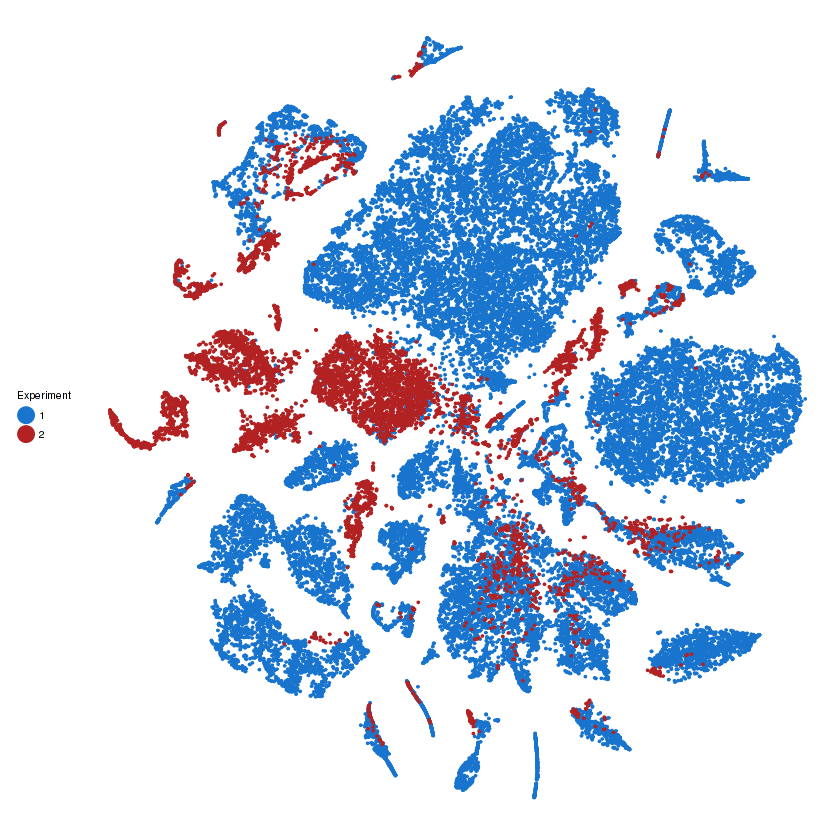

In [125]:
plot = ggplot(pData(cds), aes(
        x = tsne_1, y = tsne_2,
        color = ifelse(grepl("[a-z]", plate), "2", "1"))) +
    geom_point(size = 0.001) +
    scale_color_manual(values = c("dodgerblue3", "firebrick")) +
    guides(color = guide_legend(title = "Experiment", override.aes = list(size = 4))) +
    theme_void(base_size = 6) +
    monocle:::monocle_theme_opts() +
    theme(legend.title = element_text(size=6),
          legend.text = element_text(size=6),
          legend.margin = margin(0, -10, 0, 10),
          legend.key.width=unit(0.15, "in"),
          legend.key.height=unit(0.15, "in"),
          legend.position = "left")

show(plot)

ggsave("plots/Fig_S9e.png", plot = plot,
    units = "in", width = 3.0, height = 3.0, dpi = 300)

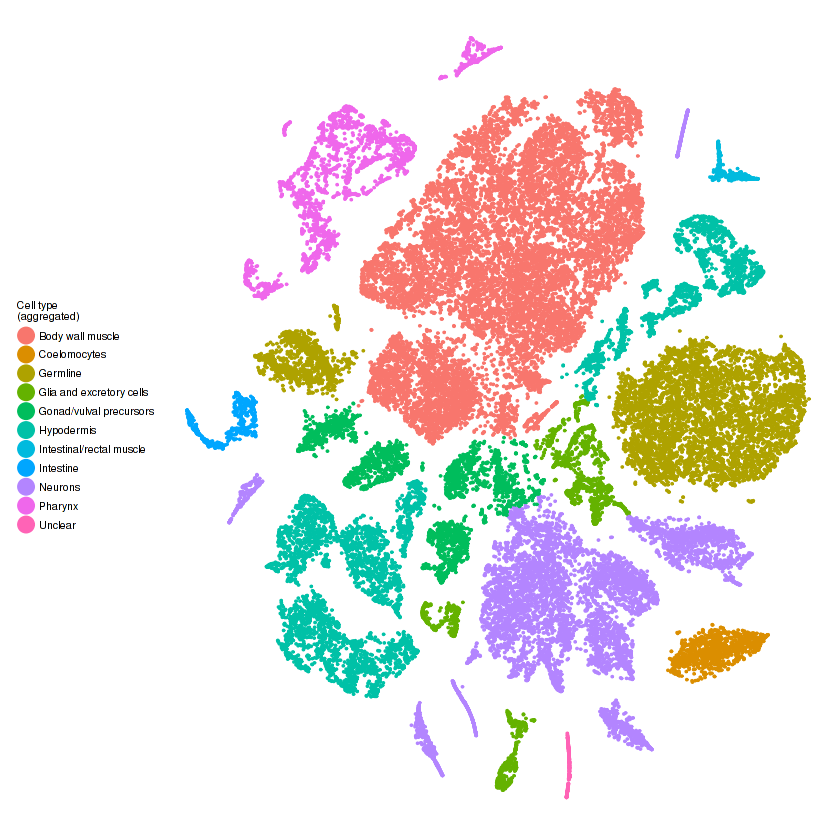

In [127]:
plot = ggplot(pData(cds), aes(x = tsne_1, y = tsne_2, color = cluster.name)) +
    geom_point(size = 0.001) +
    guides(color = guide_legend(title = "Cell type\n(aggregated)", override.aes = list(size = 4))) +
    theme_void(base_size = 6) +
    monocle:::monocle_theme_opts() +
    theme(legend.title = element_text(size=6),
          legend.text = element_text(size=6),
          legend.margin = margin(0, -10, 0, 10),
          legend.key.width=unit(0.15, "in"),
          legend.key.height=unit(0.15, "in"),
          legend.position = "left")

show(plot)

ggsave("plots/Fig_S9f.png", plot = plot,
    units = "in", width = 3.4, height = 3.0, dpi = 300)